# <\><b> Human Activity Recognition<b/> <\>

In [ ]:
#![images (4).jpg](attachment:images (4).jpg)

## import the neccessary libraries

## Data Pre-processing

def save_load_data(path, data, label):
    dp, lp = f"{path}/tdata.pickle", f"{path}/tlabel.pickle"
    if not os.path.isdir(path):
        os.mkdir(path)
        data.to_pickle(dp)
        label.to_pickle(lp)
    return pd.read_pickle(dp), pd.read_pickle(lp)

x_train,y_train=save_load_data(path=path.Path("./pickled_train"), data=train_data, label=train_labels)

x_test, y_test=save_load_data(path=path.Path("./pickled_test"), data=test_data, label=test_labels)

In [23]:
tl = pd.DataFrame(train_labels.values, columns=['activity'])


## Analysis of Features and labels

In [62]:
x = x_train.copy()
y = x_train.copy()

x['activity'] = y_train

walking = y[x['activity'] == 1]
standing = y[x['activity'] == 0]

In [63]:
mean_walking = walking.values.mean(axis=0)
mean_standing = standing.values.mean(axis=0)
mean_walking.shape, mean_standing.shape


((561,), (561,))

In [68]:
corr=['correlation()' in col for col in x_train.columns.values]
idx=[i for i in range(len(corr)) if corr[i]==True]
col = [x_train.columns.values[c] for c in idx]

## Visualize Data

In [46]:
score = cross_val_score(classifier, x_train, y_train, cv=5)

In [76]:
xs, y = shuffle(x_train.values, y_train)

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt, pdt)

<AxesSubplot:>

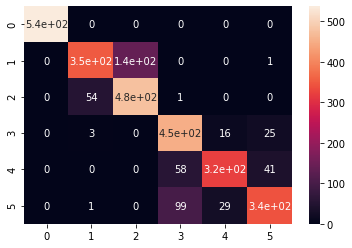

In [111]:
sns.heatmap(cm, annot=True)

In [115]:
train_set['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split

In [23]:
def define_models(models=dict()):
    pass

In [26]:
def evalute_models(trainx, trainy, testx, testy, model):
    results = dict()
    for name, model in models.items():
        results[name] = evalute_model(trainx, trainy, testx, testy, model)
        print(f"{name} {results[name]:.3f}")
    return results

In [15]:
td = test_data.values
tl = test_labels.values

td.shape, tl.shape

pd = clf.predict(td)
acc = getAccuracy(pd, tl)

acc

0.9737354085603113

In [74]:
fi = clf.feature_importances_

In [87]:
ft=filter(lambda x: x> 0.005, fi)
len(list(ft))

29

In [102]:
#Select features which have higher contribution in the final prediction

sfm = SelectFromModel(clf, threshold=0.005) 
sfm.fit(x,y)

SelectFromModel(estimator=RandomForestClassifier(max_depth=30, max_features=7,
                                                 n_estimators=250,
                                                 random_state=0),
                threshold=0.005)

In [103]:
#Transform input dataset

x1 = sfm.transform(x) 
xt1 = sfm.transform(xt)

#Let's see the size and shape of new dataset print("Size of Data set before feature selection: %.2f MB"%(Xtrain_1.nbytes/1e6))

shape = np.shape(x1)

print("Shape of the dataset ",shape)

#Size of Data set before feature selection: 5.60 MB Shape of the dataset (35000, 20)

Shape of the dataset  (7352, 29)


In [104]:
#Model training time

start = time.time() 
clf.fit(x1, y) 
end = time.time()

print("Execution time for building the Tree is: %f"%(float(end)- float(start)))

#Let's evaluate the model on test data

pre = clf.predict(xt1) 
count = 0
acc2 = getAccuracy(pre, yt)

print("Accuracy after feature selection %.2f"%(100*acc2))



Execution time for building the Tree is: 8.889826
Accuracy after feature selection 83.54
